In [1]:
import pandas as pd 
import numpy as np

In [2]:
! pip install --user xgboost

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import skew

print("ok")

ok


In [4]:
train= pd.read_csv('./Ames_Dataset_Solution/train.csv')
train_data = pd.read_csv('./Ames_Dataset_Solution/train.csv')
print (train.head())
#print (train.columns)
#print(train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [5]:
test= pd.read_csv('./Ames_Dataset_Solution/test.csv')
submission_ID = test['Id']
#print (test.head())
#print (test.columns)
print(test.shape)

(1459, 80)


In [6]:
train.drop("Id",axis=1,inplace = True)
print(train.shape)
test.drop("Id",axis=1,inplace=True)
print (test.shape)

(1460, 80)
(1459, 79)


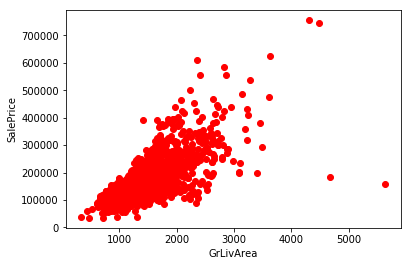

In [7]:
#Check For Outliers



plt.scatter(train['GrLivArea'],train['SalePrice'],c = "Red")



plt.xlabel("GrLivArea")



plt.ylabel("SalePrice")



plt.show()



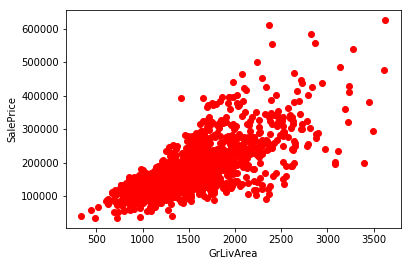

In [8]:




#Removing Outliers



train = train[train['GrLivArea']<4000]
test = test[test['GrLivArea']<4000]

plt.scatter(train['GrLivArea'],train['SalePrice'],c = "Red")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [9]:
print (train.shape)



print (test.shape)



(1456, 80)
(1458, 79)


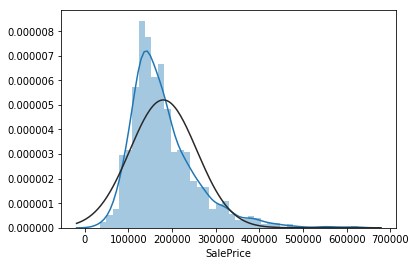

In [10]:

#Checking the distribution of plot (The distribution is right skewed )


sns.distplot(train['SalePrice'], fit=norm )

In [11]:
#Normalizing the Y values 



train['SalePrice'] = np.log1p(train['SalePrice'])




#print(train['SalePrice'])


Text(0,0.5,'frequency')

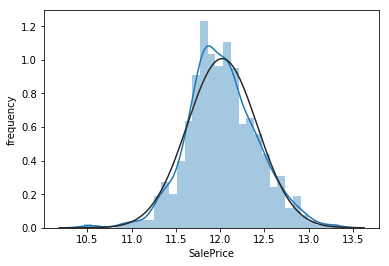

In [12]:

#Y value after normalisation 

sns.distplot(train['SalePrice'] , fit=norm)

plt.ylabel('frequency')


In [13]:

#for i in train.columns :

#   print  ( "the feature is " + str(i) + "the no. of nulls is " + str(train[i].isnull().sum()) )


In [14]:

print (train.shape)

print (test.shape)


(1456, 80)
(1458, 79)


In [15]:

for i in ['BsmtQual',"BsmtCond","BsmtExposure","FireplaceQu","Fence","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","MiscFeature","GarageQual","GarageCond"]:

    
    train[i] = train[i].fillna("No")
    
    test[i] = test[i].fillna("No")
    #print(train[i].isnull().sum())

In [16]:
for i in ['BsmtFullBath',"LotFrontage",'BsmtFinSF1','TotalBsmtSF','BsmtFinSF2','BsmtHalfBath','BsmtUnfSF','Fireplaces',"MiscFeature","MasVnrArea",'GarageArea',"GarageCars",'HalfBath','LotFrontage','MiscVal','MasVnrArea',"PoolQC",'ScreenPorch','TotRmsAbvGrd','WoodDeckSF'] :
    train[i] = train[i].fillna(0) 
    test[i] = test[i].fillna(0)
   # print(train[i].isnull().sum())

In [17]:
for i in ["Condition1","Condition2"] :
    train[i] = train[i].fillna("Norm")
    test[i] = test[i].fillna("Norm")
    print(train[i].isnull().sum())

0
0


In [18]:
for i in ["Alley","MasVnrType"] :

    train[i] = train[i].fillna("None")
    
    test[i] = test[i].fillna("None")
    
    print(train[i].isnull().sum())
    
    print(test[i].isnull().sum())
    

0
0
0
0


In [19]:

print (train.shape)
print (test.shape)

(1456, 80)
(1458, 79)


In [20]:
for i in ["HeatingQC","KitchenQual"] :
    train[i] = train[i].fillna("TA")
    test[i] = test[i].fillna("TA")

    print(test[i].isnull().sum())
    print(train[i].isnull().sum())

0
0
0
0


In [21]:
test['MSZoning'] = (test['MSZoning'].fillna("RL"))

In [22]:
(test[['Utilities','Exterior1st','Exterior2nd','SaleType','Functional']].mode())

,Utilities,Exterior1st,Exterior2nd,SaleType,Functional
0,AllPub,VinylSd,VinylSd,WD,Typ


In [23]:
test['Utilities'] = test['Utilities'].fillna("AllPub")

test['Exterior1st'] = test['Exterior1st'].fillna("VinylSd")

test['Exterior2nd'] = test['Exterior2nd'].fillna("VinylSd")

test['SaleType']= test['SaleType'].fillna("WD")

test['Functional'] = test['Functional'].fillna("Typ")


In [24]:

print (train.shape)

print (test.shape)


(1456, 80)
(1458, 79)


In [25]:

print(train.isnull().sum())
print(test.isnull().sum())

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
                 ..
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0


In [26]:
train.drop('GarageYrBlt',axis = 1,inplace = True)

test.drop('GarageYrBlt',axis = 1,inplace = True)


In [27]:

train['SalePrice'] = np.log1p(train['SalePrice'])

y = train['SalePrice']


In [28]:

train.drop('SalePrice',axis = 1,inplace = True)


In [29]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train.shape
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)
print(train.shape)
print (test.shape)

(1456, 78)
(1458, 78)


In [30]:
from sklearn.preprocessing import LabelEncoder

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
       'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
      'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
     'YrSold', 'MoSold']
for i in cols :
    lb = LabelEncoder()
    lb.fit(list(train[i].values) )
    train[i] = lb.transform(list(train[i].values))
print(train['BsmtQual'].unique())

for i in cols :
    lb = LabelEncoder()
    lb.fit(list(test[i].values) )
    test[i] = lb.transform(list(test[i].values))
print (test['BsmtQual'].unique())

[2 4 0 3 1]
[4 2 0 1 3]


In [37]:
#print ("The correlation to target variable is ")
corr_train = (train.corr())
corr_test = test.corr()
#print (corr_train['SalePrice'].sort_values(ascending = False))
#print (corr_test['SalePrice'].sort_values(ascending = False))

In [151]:
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [152]:
# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
#train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               #"Stone" : 1, "None" : 0})
# House completed before sale or not
#train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                     # "Family" : 0, "Normal" : 0, "Partial" : 1})



In [153]:
# Create new features
# 3* Polynomials on the top 10 existing features
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [154]:
numerical_features_train = train.select_dtypes(exclude = ['object'])
numerical_features_test = test.select_dtypes(exclude = ['object'])

print (numerical_features_train.isnull().sum())

MSSubClass             0
LotFrontage            0
LotArea                0
Street                 0
Alley                  0
LotShape               0
LandSlope              0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             0
ExterQual              0
ExterCond              0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
HeatingQC              0
CentralAir             0
1stFlrSF               0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
                      ..
AllSF                  0
AllFlrsSF              0
AllPorchSF             0
AllSF-2                0
AllSF-3                0
AllSF-Sq               0
AllFlrsSF-2            0
AllFlrsSF-3            0
AllFlrsSF-Sq           0


In [155]:
skewed = numerical_features_train.apply(lambda x : skew(x))
skewed = skewed[abs(skewed) > 0.5]
skewed_features = skewed.index
numerical_features_train[skewed_features] = np.log1p(numerical_features_train[skewed_features])
print (numerical_features_train.columns)

skewed = numerical_features_test.apply(lambda x : skew(x))
skewed = skewed[abs(skewed) > 0.5]
skewed_features = skewed.index
numerical_features_test[skewed_features] = np.log1p(numerical_features_test[skewed_features])
print (numerical_features_test.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'GarageCars-Sq', 'TotalBath-2', 'TotalBath-3', 'TotalBath-Sq',
       'KitchenQual-2', 'KitchenQual-3', 'KitchenQual-Sq', 'GarageScore-2',
       'GarageScore-3', 'GarageScore-Sq'],
      dtype='object', length=282)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=220)


In [160]:
categorical_features_train = train.select_dtypes(include = ['object'])
categorical_features_test = test.select_dtypes(include = ['object'])
print(categorical_features_train)
print (categorical_features_train.isnull().sum())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1456 rows x 0 columns]
Series([], dtype: float64)


In [161]:
categorical_features_train.isnull().sum()
#categorical_features_train['Electrical'] = categorical_features_train['Electrical'].fillna("SBrkr")
print (categorical_features_train.isnull().sum())
print("the length of df is ")
#print (len((categorical_features_train).columns))

categorical_features_test.isnull().sum()
#categorical_features_test['Electrical'] = categorical_features_test['Electrical'].fillna("SBrkr")
print (categorical_features_test.isnull().sum())
print ("The length of df is")
##print (len((categorical_features_test).columns))

Series([], dtype: float64)
the length of df is 
Series([], dtype: float64)
The length of df is


In [127]:
train_objs_num = len(categorical_features_train)
dataset = pd.concat(objs=[categorical_features_train, categorical_features_test], axis=0)
dataset = pd.get_dummies(dataset)
categorical_features_train = (dataset[:train_objs_num])
categorical_features_test = (dataset[train_objs_num:])
print (categorical_features_train.columns)
print (categorical_features_test.columns)

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=163)
Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=163)


In [128]:
for i in categorical_features_train.columns:
        print ((len((categorical_features_train[i].unique()))))
#print ("line break ")
for i in categorical_features_test.columns:
        print ((len((categorical_features_test[i].unique()))))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [129]:
train = pd.concat([numerical_features_train,categorical_features_train],axis= 1)
print (train.shape)

(1456, 220)


In [130]:
test = pd.concat([numerical_features_test,categorical_features_test],axis= 1)
print (test.shape)

(1458, 220)


In [131]:
X_train,X_test,Y_train,Y_test = train_test_split(train,y, test_size = 0.2,random_state = 42)
print (X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1164, 220) (292, 220) (1164,) (292,)


In [43]:
#print (X_train.head(10))

In [132]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV,ElasticNetCV,LinearRegression
from sklearn.model_selection import cross_val_score

def cv_error_train(mod):
    rmse_train = np.sqrt(-cross_val_score(mod, X_train, Y_train,scoring= "neg_mean_squared_error" ,cv = 10))
    return (rmse_train)
def cv_error_test(mod):
    rmse_test = np.sqrt(-cross_val_score(mod, X_test, Y_test,scoring = "neg_mean_squared_error" ,cv = 10))
    return (rmse_test)

0.011091494264838906
66103008.23689733


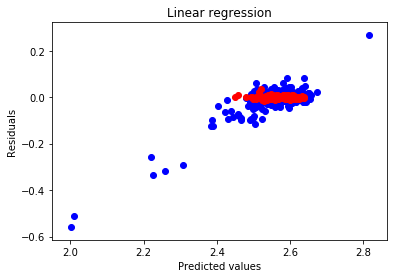

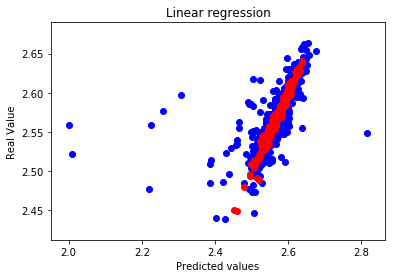

In [133]:
#Linear_Regression_Without_Regularization :

model = LinearRegression()
train_model = model.fit(X_train,Y_train)
test_model = model.fit(X_test,Y_test)

print (cv_error_train(train_model).mean())
print (cv_error_test(test_model).mean())

y_train_predict = train_model.predict(X_train)
y_test_predict = test_model.predict(X_test)

#plotting the residual sum of squares 

plt.scatter(y_train_predict,y_train_predict - Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,y_test_predict - Y_test,c = "red",label = "Test data",)

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.show()

plt.scatter(y_train_predict,Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,Y_test,c = "red",label = "Test data",)

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real Value")

plt.show()

In [134]:
y_predict = train_model.predict(test)
print (y_predict)

[2.91739728 2.60639794 2.84011616 ... 3.02746082 2.80422998 2.85268011]


5.0
0.009193298884288402
0.011746514561010396


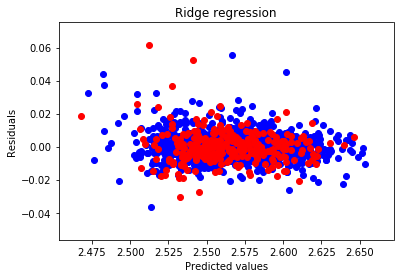

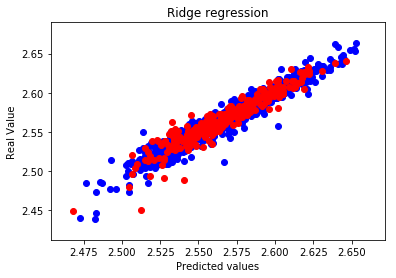

In [135]:
#Ridge Regression 

ridge = RidgeCV(alphas= [0.01,0.03,0.05,0.1,0.3,0.5,1.0,3.0,5.0,10.0,15.0,30.0,50.0,100.0])
ridge.fit(X_train,Y_train)

print(ridge.alpha_)
print (cv_error_train(ridge).mean())
print (cv_error_test(ridge).mean())

y_train_predict = ridge.predict(X_train)
y_test_predict = ridge.predict(X_test)
#plotting the residual sum of squares 

plt.scatter(y_train_predict,y_train_predict - Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,y_test_predict - Y_test,c = "red",label = "Test data",)

plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.show()

plt.scatter(y_train_predict,Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,Y_test,c = "red",label = "Test data",)

plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real Value")

plt.show()

In [136]:
y_predict_ridge = ridge.predict(test)
print (y_predict_ridge)

[2.54043694 2.55959393 2.55994042 ... 2.57565849 2.53020078 2.57913406]


In [137]:
coeff = pd.Series(ridge.coef_,index= X_train.columns)
print (coeff.sort_values(ascending = False))

GrLivArea                0.013481
OverallCond              0.013214
CentralAir               0.008111
Neighborhood_Crawfor     0.007937
Functional               0.007911
1stFlrSF                 0.007642
Exterior1st_BrkFace      0.006916
LotArea                  0.006767
BsmtCond                 0.006117
Neighborhood_StoneBr     0.006043
MSZoning_FV              0.005501
HalfBath                 0.005051
OverallQual              0.004645
GarageType_BuiltIn       0.004231
BsmtFullBath             0.003889
Neighborhood_NoRidge     0.003759
SaleType_New             0.003689
Heating_GasW             0.003497
BsmtFinSF1               0.003259
Heating_GasA             0.003223
LotConfig_CulDSac        0.003102
MasVnrType_Stone         0.003038
Fireplaces               0.003027
Foundation_Stone         0.002932
SaleCondition_Normal     0.002917
RoofMatl_WdShngl         0.002894
TotRmsAbvGrd             0.002891
MSZoning_RL              0.002856
Neighborhood_BrkSide     0.002718
Condition2_Fee

In [138]:
print( "The ridge model has eliminated " + str(sum(coeff == 0)) + " features")
print ("The ridge model has kept " + str(sum(coeff != 0)) + " features")

The ridge model has eliminated 3 features
The ridge model has kept 217 features


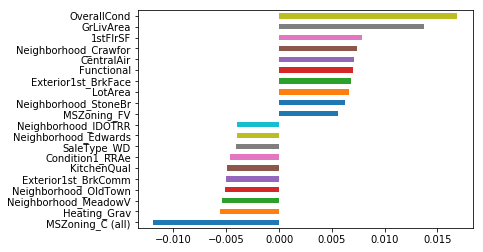

In [95]:
top_bottom_10 = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])

top_bottom_10.plot(kind = "barh")

0.0001
0.009212414473694535
0.010231193119560267


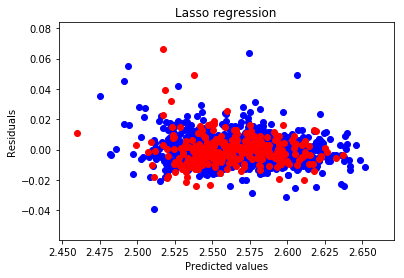

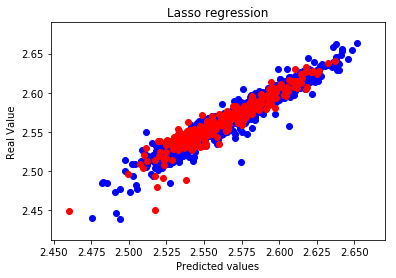

In [96]:
lasso = LassoCV(alphas= [0.0001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1.0,3.0,5.0,10.0,30.0,50.0],cv = 10,max_iter = 50000)
lasso.fit(X_train,Y_train)

print(lasso.alpha_)
print (cv_error_train(lasso).mean())
print (cv_error_test(lasso).mean())

y_train_predict = lasso.predict(X_train)
y_test_predict = lasso.predict(X_test)
#plotting the residual sum of squares 

plt.scatter(y_train_predict,y_train_predict - Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,y_test_predict - Y_test,c = "red",label = "Test data",)

plt.title("Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.show()

plt.scatter(y_train_predict,Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,Y_test,c = "red",label = "Test data",)

plt.title("Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Real Value")

plt.show()

In [97]:
y_test_predict = lasso.predict(X_test)

In [98]:
coef = pd.Series(lasso.coef_,index= X_train.columns)

In [99]:
print ("The lasso model has kept " + str(sum(coef != 0)) + " features")
print ("The lasso model has eliminated " + str(sum(coef == 0)) + " features")

The lasso model has kept 59 features
The lasso model has eliminated 161 features


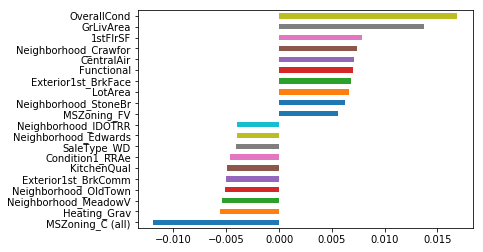

In [100]:
top_bottom_10 = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])

top_bottom_10.plot(kind = "barh")

In [101]:
y_predict_lasso = lasso.predict(test)
print (y_predict)

[2.68633473 2.49407789 2.66064915 ... 2.74396667 2.62515358 2.67324352]


0.0001
0.008908118137820744
0.009727418495750383


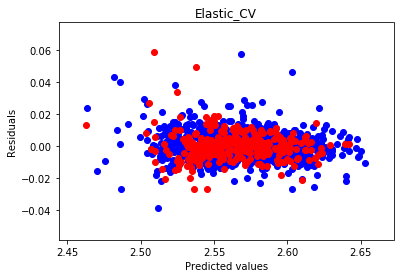

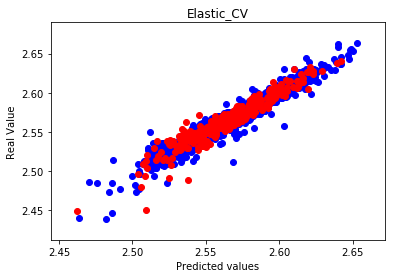

In [102]:
elastic_cv = ElasticNetCV( l1_ratio = [0.1,0.3,0.5,0.7,1.0],
                            alphas= [0.0001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1.0,3.0,5.0,10.0,30.0,50.0],
                           cv = 10)

elastic_cv.fit(X_train,Y_train)

print(elastic_cv.alpha_)
print (cv_error_train(elastic_cv).mean())
print (cv_error_test(elastic_cv).mean())

y_train_predict = elastic_cv.predict(X_train)
y_test_predict = elastic_cv.predict(X_test)
#plotting the residual sum of squares 

plt.scatter(y_train_predict,y_train_predict - Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,y_test_predict - Y_test,c = "red",label = "Test data",)

plt.title("Elastic_CV")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.show()

plt.scatter(y_train_predict,Y_train,c = "blue",label = "Training data")
plt.scatter(y_test_predict,Y_test,c = "red",label = "Test data",)

plt.title("Elastic_CV")
plt.xlabel("Predicted values")
plt.ylabel("Real Value")

plt.show()

In [60]:
y_predict = elastic_cv.predict(test)
print (y_predict)


[2.58553275 2.60806748 2.6076884  ... 2.62530181 2.57396321 2.62498615]


In [103]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, n_jobs=-1, random_state=1234)
rf.fit(X_train,Y_train)

print (cv_error_train(rf).mean())
print (cv_error_test(rf).mean())

0.010312407869669932
0.012697943863285308


In [104]:
y_predict_rf = rf.predict(test)

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

print (cv_error_train(rf).mean())
print (cv_error_test(rf).mean())

0.010312407869669927
0.012697943863285285


In [106]:
y_predict_gbr = gbr.predict(test)

In [107]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, Y_train)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
model_xgb.fit(X_train, Y_train)

print (cv_error_train(model_xgb).mean())
print (cv_error_test(model_xgb).mean())

0.009345401850533602
0.011514028999119848


In [139]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [140]:
lgb_model.fit(X_train, Y_train)

print (cv_error_train(lgb_model).mean())
print (cv_error_test(lgb_model).mean())

0.008827120000671955
0.01128321084701739


In [141]:
y_predict_lgb = lgb_model.predict(test)

In [142]:
Final_price = np.expm1(y_predict_lgb)
Final_price_1 = np.expm1(Final_price)

In [144]:
sub = pd.DataFrame()
sub['Id'] = submission_ID
sub = sub[sub['Id'] != 2550]
sub['SalePrice'] = Final_price_1.round(2)
sub.to_csv('submission.csv',index=False)
print (sub)

        Id  SalePrice
0     1461  117821.53
1     1462  153945.36
2     1463  180856.81
3     1464  185697.47
4     1465  206372.82
5     1466  187751.22
6     1467  169264.29
7     1468  168764.95
8     1469  181631.79
9     1470  123533.08
10    1471  204696.76
11    1472  105244.83
12    1473  100070.48
13    1474  160018.24
14    1475  127976.73
15    1476  368747.43
16    1477  248932.32
17    1478  283362.51
18    1479  260685.87
19    1480  479923.94
20    1481  307241.61
21    1482  206779.07
22    1483  167891.78
23    1484  183934.36
24    1485  178749.85
25    1486  203849.31
26    1487  321854.58
27    1488  233178.83
28    1489  210770.62
29    1490  212503.55
...    ...        ...
1429  2890   75225.85
1430  2891  134350.17
1431  2892   52222.50
1432  2893   90868.18
1433  2894   65094.03
1434  2895  360283.56
1435  2896  307742.12
1436  2897  185366.24
1437  2898  147407.49
1438  2899  225751.10
1439  2900  156894.04
1440  2901  187000.39
1441  2902  196581.88
1442  2903